# Régression Polynomiale: 1 variable $x_1$

In [354]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## Dataset 
Pour développer un modèle polynomial à partir des équations de la régression linéaire, il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice $X$ ainsi qu'un nombre égal de lignes dans le vecteur $\theta$.

Dans ce notebook, nous allons développer un ploynome de degré 2: $f(x) = ax^2 + bx + c$. Pour celà, il faut développer les matrices suivantes:

$X = \begin{bmatrix} x^{2 (1)} & x^{(1)} & 1 \\ ... & ... & ... \\ x^{2 (m)} & x^{(m)} & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ *note : le vecteur $y$ reste le meme que pour la régression linéaire*

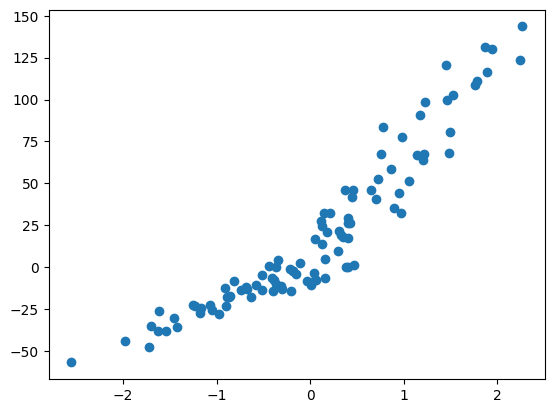

In [355]:

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire

plt.scatter(x, y) # afficher les résultats. x en abscisse et y en ordonnée

In [356]:
# Verification des dimensions
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)


In [358]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [359]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.63743703],
       [-0.39727181],
       [-0.13288058]])

## Modèle

In [360]:
def model(X, theta):
    return X.dot(theta)

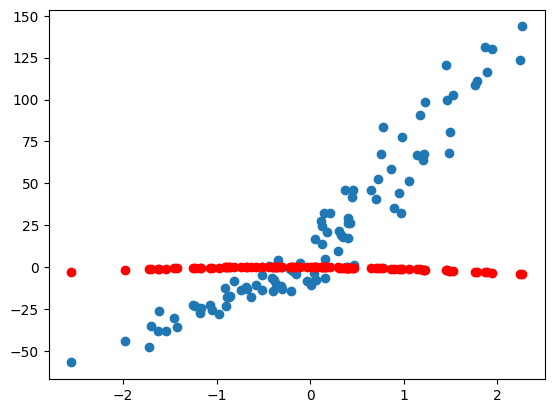

In [361]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

## Fonction Cout :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenter l'Erreur Quadratique Moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [362]:
def cost_function(X,y,theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [363]:
cost_function(X,y,theta)

1328.6654828872622

## Gradient et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [364]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [365]:
def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history= np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta= theta - learning_rate * grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta, cost_history

## Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modèle entrainé, on observe les resultats par rapport a notre Dataset

In [366]:
# X.shape
theta_final, cost_history= gradient_descent(X,y,theta,learning_rate=0.01, n_iterations=1000)
theta_final

array([[ 8.60077615],
       [42.23116732],
       [ 8.18143081]])

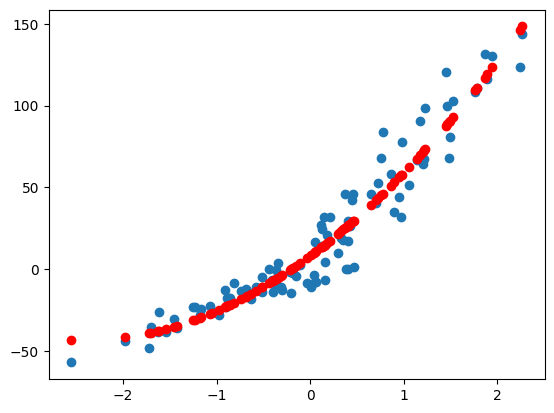

In [367]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.scatter(x,predictions,c='r')

## Courbes d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout à travers les itérations. On est sensé obtenir une courbe qui diminue à chaque itération jusqu'à stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible.

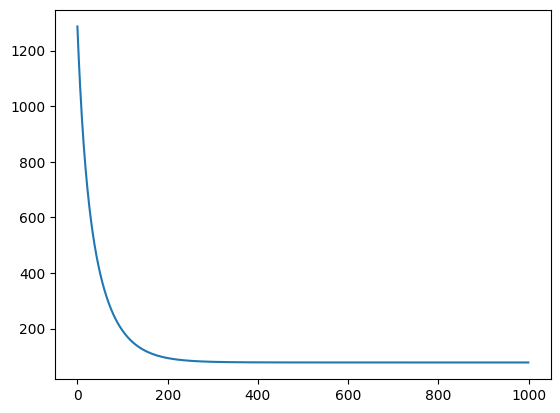

In [368]:
plt.plot(range(1000),cost_history)

Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le coefficient de détermination, aussi connu sous le nom R². Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele:

![Coefficient de détermination](coeff_determination.png).



In [369]:
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v= ((y - y.mean())**2).sum()
    return 1- u/v

In [370]:
coef_determination(y,predictions)

0.9287186469389942